In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from numba import njit

Реализуйте итерационный метод Шульца для вычисления обратной матрицы.

**Описание метода.**


Введем невязку $\Psi^{(k)} = E - AX^{(k)}$, где $X^{(k)}$ - приближение с номером $k$.

Рассмотрим $(E - \Psi^{(k)})^{-1} = E + (\Psi^{(k)}) + (\Psi^{(k)})^2 + (\Psi^{(k)})^3 + ... = (AX^{(k)})^{-1} = (X^{(k)})^{-1}A^{-1}$

Умножим обе части на $X^{(k)}$:

$X^{(k)}(\sum\limits_{i = 0}^{\infty}(\Psi^{(k)})^i) = A^{-1}$

К сожалению, считать бесконечный ряд мы не можем. Таким образом мы можем ввести итерацию :

$X^{(k + 1)} = X^{(k)}(\sum\limits_{i = 0}^{m}(\Psi^{(k)})^i)$

Где $m$ - порядок метода.

Получается порядок действий:

* Задать начальное приближение, порядок метода и необходимую точность.
* Вычислить невязку : $\Psi^{(k)} = E - AX^{(k)}$
* Проверить норму невязки на точность
* Найти следующее приближение по формуле: $X^{(k + 1)} = X^{(k)}(\sum\limits_{i = 0}^{m}(\Psi^{(k)})^i)$


**Замечание:**

Данный метод сходится при норме первой невязки меньше единицы.

In [2]:
# @njit
def inv(A: np.ndarray, m: np.int64 = np.int64(1e3)):
    """_summary_

    Args:
        A (np.ndarray): Матрица, к которой мы хотим найти обратнуб
        m (np.int64, optional): порядок метода. Defaults to np.int64(1e4).
    """
    E = np.eye(A.shape[0])
    history = []
    result = E / np.linalg.det(A)
    error = E - A @ result
    eps = np.max(np.max(np.abs(error)))
    history.append(eps)
    print('starting iteration process')
    for _ in range(m):
        error = E - A @ result
        history.append(np.max(np.max(np.abs(error))))
        if history[-1] < 1e-2:
            return result, history
        result += result @ (E + error)
    return result, history

starting iteration process
1.0000000000026423


/tmp/ipykernel_46270/1174181441.py:21: RuntimeWarning: overflow encountered in matmul
  result += result @ (E + error)
/tmp/ipykernel_46270/1174181441.py:17: RuntimeWarning: invalid value encountered in matmul
  error = E - A @ result


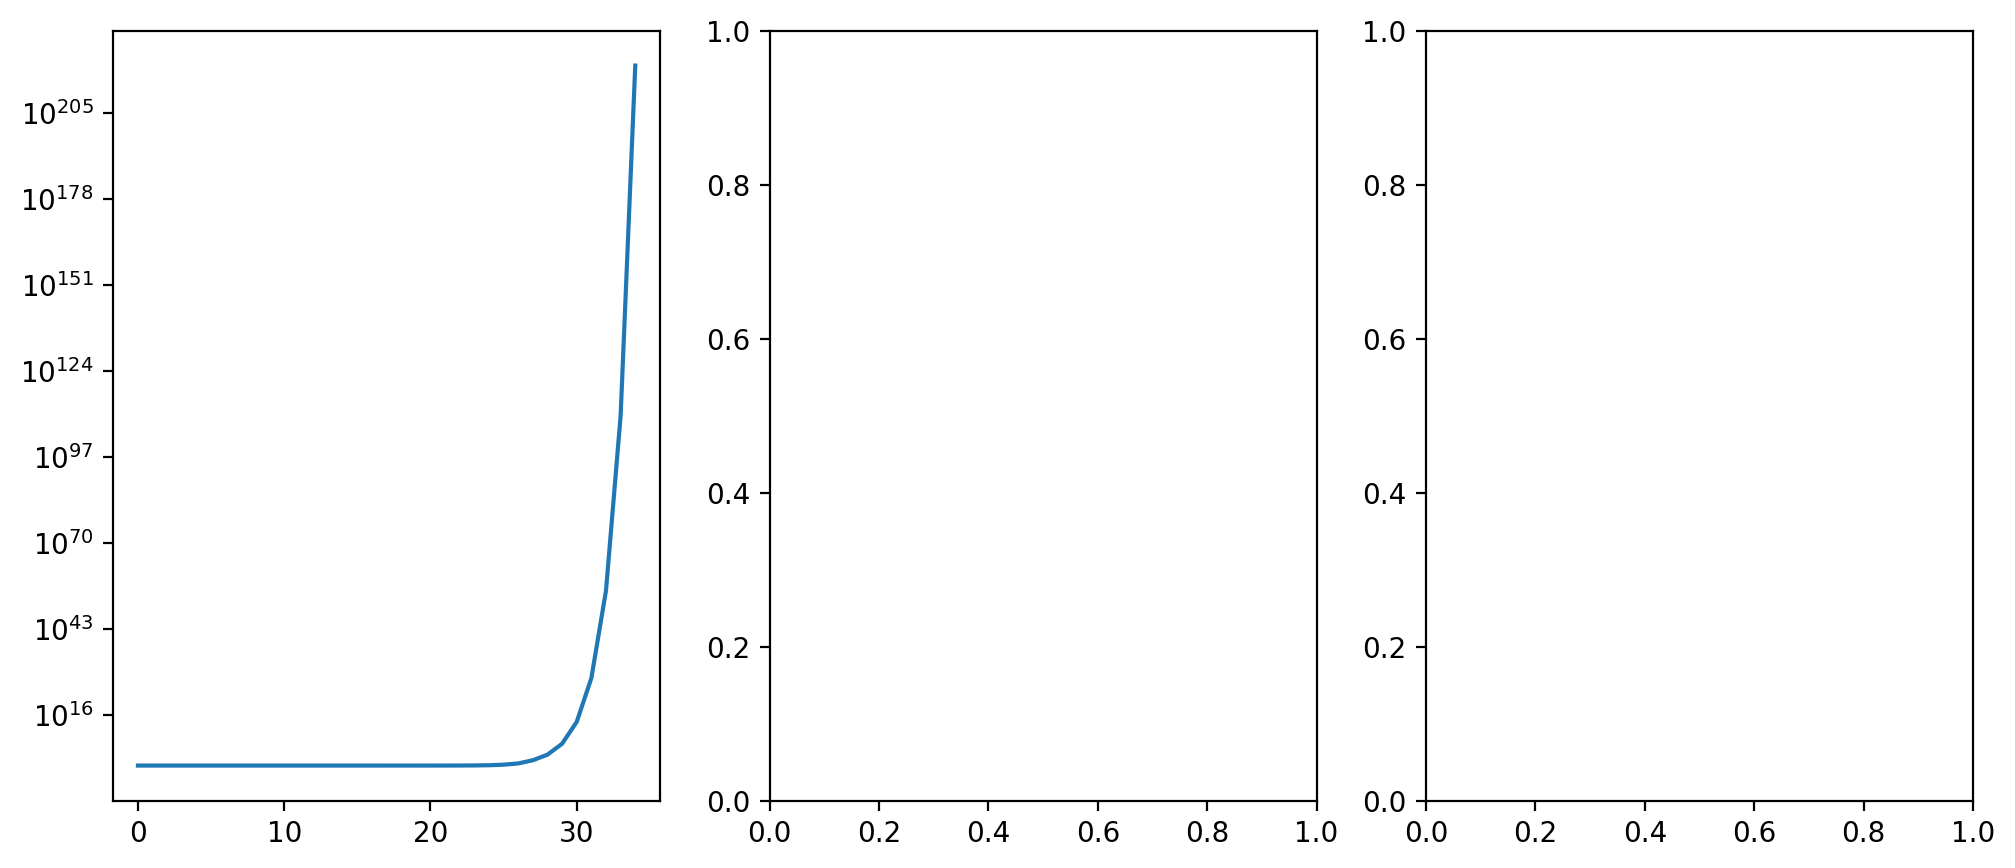

In [3]:
N = 5
A = (np.random.random(size = (N, N)) - 0.5) * 2000
fig, ax = plt.subplots(1, 3,figsize = (12, 5), dpi = 200)
A_inv_shulz, history = inv(A)
ax[0].plot(history)
ax[0].set_yscale('log')
print(history[0])